In [1]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import xgboost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Function for Gridsearch
def modelTuning(params):
    gbm = xgboost.XGBRegressor()

    grid_mse = GridSearchCV(estimator=gbm, param_grid=params,
                       scoring='neg_mean_squared_error', cv=4, verbose=1)
    grid_mse.fit(X, y)


    print("Best parameters found: ", grid_mse.best_params_)
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
    

In [0]:
#Load train_data only to keep the num_train 
df_train_data = pd.read_csv('/content/drive/My Drive/IHU/NLP/Coursework/data/train.csv', encoding="ISO-8859-1")

#keep the number of lines for train tupples
#in order to split them again later 
num_train = df_train_data.shape[0]

In [0]:
#Load features from features.csv
df_features = pd.read_csv('/content/drive/My Drive/IHU/NLP/Coursework/features.csv', encoding="ISO-8859-1")

In [0]:
#Create the df_train dataframe
#num_train takes its part now in this step 

df_train = df_features.iloc[:num_train]

In [0]:
#Create X and y from df train 

y = df_train['relevance'].values
X = df_train.drop(['id','relevance',],axis=1).values

In [0]:
#GridSearch for XGBoost

params = {
        'min_child_weight': [1,2],
        'gamma': [0, 0.5],
        'n_estimators':[40, 100, 200],
        'subsample': [0.6, 0.75],
        'learning_rate':[0.1 ,0.08],
        'colsample_bytree': [1,3],
        'max_depth': [2,3,7,10,40]
        }
modelTuning(params)

Fitting 4 folds for each of 480 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ELENA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 3 for Parameter colsample_bytree exceed bound [0,1]
colsample_bytree: Subsample ratio of columns, resample on each tree construction.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed: 393.7min finished


Best parameters found:  {'colsample_bytree': 1, 'gamma': 0.5, 'learning_rate': 0.08, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.75}
Lowest RMSE found:  0.46758384093643834


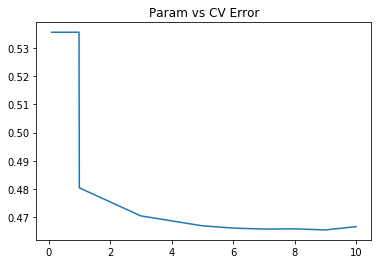

In [0]:
## GridSearch for Gradient Boosting only for max_depth

params = [.1, .3, .5, .7, .9, .99,1,3,5,6,7,8,9,10]
test_scores = []
for param in params:
    clf = GradientBoostingRegressor(n_estimators=40,max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X, y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("Param vs CV Error");